In [ ]:
import requests # used for webscraping - i.e. getting info from a website (derebit)
import sqlite3 # used to connect to a database, you store your data in the database using sqlite3
import pandas as pd # python library - use for data manipulation
import numpy as np # used for maths
import datetime # used for date operations
from math import pi, sin # mathematical functions
from matplotlib import pyplot as plt # graph plotting

In [ ]:
# Formatting dates for this Friday's expiration and next Friday's:
today = datetime.date.today()
friday = today + datetime.timedelta( (4-today.weekday()) % 7 )
next_friday = friday + datetime.timedelta(7)

friday = (datetime.date.strftime(friday, "%d%b%y")).upper()
if friday[0] == "0":
    friday = friday[1:]

next_friday = (datetime.date.strftime(next_friday, "%d%b%y")).upper()
if next_friday[0] == "0":
    next_friday = next_friday[1:]

In [ ]:
# ints = np.arange(10000, 30000, 1000).tolist()
ints = np.arange(10000, 30000, 1000).tolist()
strike_prices = [str(x) for x in ints]
strike_prices

['10000',
 '11000',
 '12000',
 '13000',
 '14000',
 '15000',
 '16000',
 '17000',
 '18000',
 '19000',
 '20000',
 '21000',
 '22000',
 '23000',
 '24000',
 '25000',
 '26000',
 '27000',
 '28000',
 '29000']

In [ ]:
#Bitcoin strike prices
ints = np.arange(10000, 30000, 1000).tolist()
strike_prices = [str(x) for x in ints]
# The strike price is the predetermined price at which the holder of an option can buy (for a call option) or sell (for a put option) the underlying asset

#API call formatting
token = "BTC" # or ('ETH')
expiration_date = [friday, next_friday]

#P=put C=call:
option_type = "C"
# Put options give the holder the right, but not the obligation, to sell an underlying asset at a specified price within a specified time period.
# Call options give the holder the right, but not the obligation, to buy an underlying asset at a specified price within a specified time period.

raw_strike_data=[]

for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json() # this is the only time we use requests
        if 'error' not in result:
            raw_strike_data.append([token, date, strike, result["result"][0]['volume'], result["result"][0]['open_interest'], result["result"][0]['underlying_price']])

strike_price_df = pd.DataFrame(raw_strike_data, columns =['Token','Expiration Date', 'Strike Price','Volume','Open Interest','Underlying Price'])
# above is the only time we use pandas
print(strike_price_df)


   Token Expiration Date Strike Price  Volume  Open Interest  Underlying Price
0    BTC         27OCT23        18000     0.0            0.3           29585.4
1    BTC         27OCT23        20000     0.0            0.1           29585.4
2    BTC         27OCT23        21000     0.0            0.0           29585.4
3    BTC         27OCT23        22000     0.0           87.6           29585.4
4    BTC         27OCT23        23000     0.0           65.4           29585.4
5    BTC         27OCT23        24000     0.0          199.7           29585.4
6    BTC         27OCT23        25000     0.0          107.7           29585.4
7    BTC         27OCT23        26000     0.0          118.5           29585.4
8    BTC         27OCT23        27000    10.0          186.5           29585.4
9    BTC         27OCT23        28000   105.4          487.7           29585.4
10   BTC         27OCT23        29000     1.1          348.1           29585.4


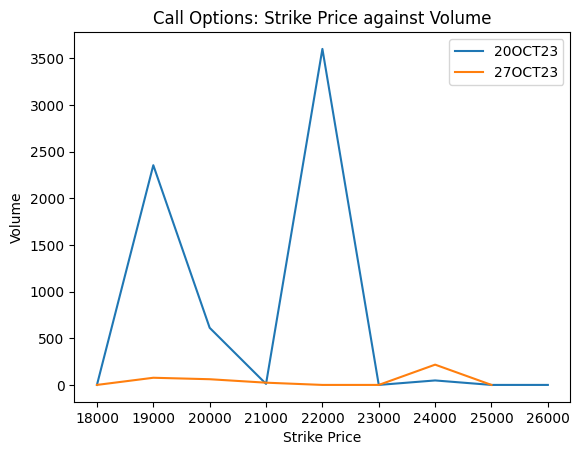

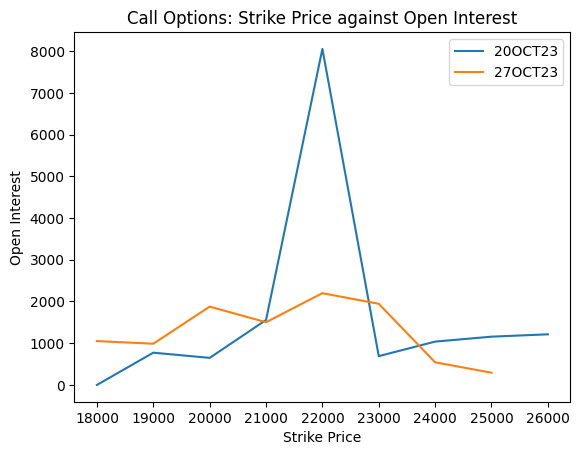

In [ ]:
# PLOTS
#Graph 1 will denote Volume against Strike price between friday and next_friday (Call options)
x1 = [*range(18000, 27000, 1000)]
y1 = [0.0, 2355.5, 612.2, 11.0, 3602.1, 0.0, 48.0, 0.0, 0.0]

plt.plot(x1, y1, label = friday)


x2 = [*range(18000, 26000, 1000)]
y2 = [0.0, 76.8, 61.1, 24.0, 0.0, 0.0, 217.3, 0.0]

plt.plot(x2, y2, label = next_friday)

plt.xlabel('Strike Price')
plt.ylabel('Volume')
plt.title('Call Options: Strike Price against Volume')
plt.legend()
plt.show()
#Graph 2 will denote Open Interest against Strike price between friday and next_friday(Call options)

x1 = [*range(18000, 27000, 1000)]
y1 = [0.1, 772.9, 648.2, 1556.4, 8052.3, 690.4, 1038.1, 1156.5, 1213.0]

plt.plot(x1, y1, label = friday)

x2 = [*range(18000, 26000, 1000)]
y2 = [1051.1, 987.3, 1876.6, 1503.0, 2199.1, 1943.8, 542.3, 292.7]

plt.plot(x2, y2, label = next_friday)
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Call Options: Strike Price against Open Interest')
plt.legend()
plt.show()

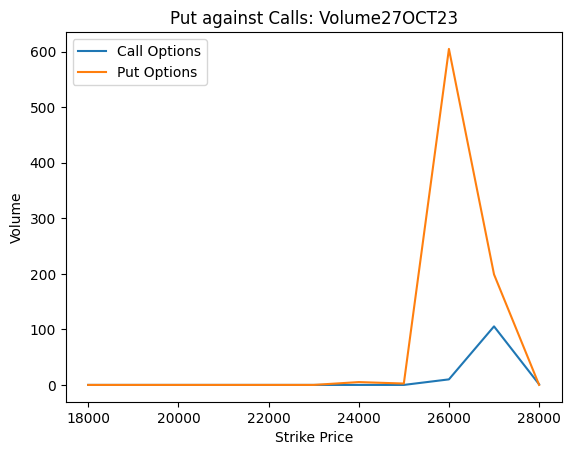

In [ ]:
#Graph 3 will analyse the differences between put and call options popularities w.r.t Volume on the given expiration updating via the URL

#quick comparative def
option_type = "C"
option_type2 = "P"

x1 = [*range(18000, 29000, 1000)]
y1 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
            y1.append(result["result"][0]['volume'])

plt.plot(x1, y1, label = 'Call Options')

x2 = [*range(18000, 29000, 1000)]
y2 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type2
        result = requests.get(string).json()
        if 'error' not in result:
            y2.append(result["result"][0]['volume'])

plt.plot(x2, y2, label = 'Put Options')

plt.xlabel('Strike Price')
plt.ylabel('Volume')
plt.title('Put against Calls: Volume' + next_friday)
plt.legend()
plt.show()

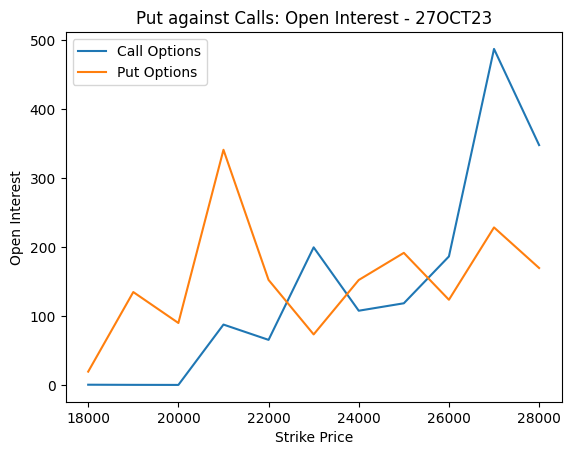

In [ ]:
#Graph 4 will analyse the differences between put and call options popularities w.r.t Open Interest on the given expiration (16SEP22) from the URL

x1 = [*range(18000, 29000, 1000)]
y1 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type
        result = requests.get(string).json()
        if 'error' not in result:
            y1.append(result["result"][0]['open_interest'])

plt.plot(x1, y1, label = 'Call Options')

x2 = [*range(18000, 29000, 1000)]
y2 = []
for date in expiration_date:
    for strike in strike_prices:
        string = "https://test.deribit.com/api/v2/public/get_book_summary_by_instrument?instrument_name="+token+"-"+date+"-"+strike+"-"+option_type2
        result = requests.get(string).json()
        if 'error' not in result:
            y2.append(result["result"][0]['open_interest'])

plt.plot(x2, y2, label = 'Put Options')

plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Put against Calls: Open Interest - ' + next_friday)
plt.legend()
plt.show()
